# Introduction to pyGeoDa

pyGeoDa is a python library for spatial data analysis. It is a python wrapper
of the libgeoda library, which is a C++ library based on GeoDa software.

## 1. Install pygeoda

Like GeoDa desktop software, `pygeoda` will be avaiable to all platforms including: Mac, Linux and Windows. 
In current development stage, only Mac OSX version `pygeoda` is avaiable to be installed using `pip`.

> Note: check pip page `pygeoda 0.1` at: https://pypi.org/project/pygeoda/


### 1.1 Install using pip

You can use `pip` to install pygeoda 0.1 on Mac OSX 10.14 (Majave):
```Python
pip install pygeoda
```
> Note: There is no dependencies of `pygeoda`.

### 1.2 Install from source

You can also download the source code from: http://github.com/lixun910/libgeoda.
The `pygeoda` is located at swig/Python directory. You need to compile the 
libgeoda library first, and then build `pygeoda` using the shell script `build.sh`.

## 2. Using pygeoda

Using pygeoda is easy and straight forward. There is only one main entry: 
the `GeoDa` class, which can be imported from `pygeoda` package:

In [1]:
from pygeoda import GeoDa

### 2.1 Load Spatial Data
There are two ways to construct a GeoDa object: 
the first one is passing the path of the spatial data as an argument, so that
`pygeoda` will read spatial data to construct an instance; the second one
is creating a GeoDa object from a `geopandas` object. 

The former method is focused in this tutorial; the latter method will be 
explained in next tutorial.

The data formats that pygeoda can read directly:
```
  ESRI Shapefile -vector- (rw+v): ESRI Shapefile
  MapInfo File -vector- (rw+v): MapInfo File
  CSV -vector- (rw+v): Comma Separated Value (.csv)
  GML -vector- (rw+v): Geography Markup Language (GML)
  GPX -vector- (rw+v): GPX
  KML -vector- (rw+v): Keyhole Markup Language (KML)
  GeoJSON -vector- (rw+v): GeoJSON
  TopoJSON -vector- (rov): TopoJSON
  OpenFileGDB -vector- (rov): ESRI FileGDB
  GFT -vector- (rw+): Google Fusion Tables
  CouchDB -vector- (rw+): CouchDB / GeoCouch
  Carto -vector- (rw+): Carto
```
For example, you can use the path of a ESRI shapefile to create a 
`GeoDa` instance:


In [3]:
gda = GeoDa("/Users/xunli/github/libgeoda/data/natregimes.shp")

With the instance of `GeoDa`, you can call different functions provided
by `libgeoda`. For example, to check the meta data of the loaded spatial
data:

In [5]:
n_col = gda.GetNumCols()
n_obs = gda.GetNumObs()
field_names = gda.GetFieldNames()
field_types = gda.GetFieldTypes()

### 2.2 Access Table Data
Using function GetNumericCol(string col_name) to get 
numeric data (tuple) from column “HR60”:

In [19]:
hr60 = gda.GetNumericCol("HR60")

### 2.3 Spatial Weights
Using function CreateContiguityWeights(string poly_id="", int order=1, bool include_lower_order=false) 
to create a Queen contiguity weights:


In [8]:
queen_w = gda.CreateContiguityWeights()

The function `CreateContiguityWeights` returns an instance of 
`GeoDaWeight` object. One can access the meta data of the spatial
weights by accessing the attributes of `GeoDaWeight` object:

In [10]:
queen_w.is_symmetric
queen_w.sparsity
queen_w.density
queen_w.min_nbrs
queen_w.max_nbrs
queen_w.mean_nbrs

5.889141004862236

### 2.4 Spatial Data Analysis
#### 2.4.1 Local Spatial Autocorrelation
Using the created Queen weights and the data “HR60”,
 we can call function LISA(GeoDaWeight w, tuple data) to compute the 
 local spatial autocorrelation of variable “HR60”. We can access the 
 LISA results by calling the “getter” methods of the returned LISA object.

In [12]:
lisa = gda.LISA(queen_w, hr60)

get local Moran values:


In [13]:
lms = lisa.GetLocalMoranValues()
print(lms[:20])

(0.5016982232699534, 0.28142804448894865, 0.25742057822288356, 0.14121955625028812, 0.40564764631589617, 0.15979543437294647, -0.2725482532572344, -0.30667659872234604, 0.3610350320931304, -0.7261968015944062, -0.26515905505502047, 0.04716326166243362, 0.4350835574869135, 0.6355608662908028, 0.4288698616676016, 0.40070957852305406, 0.1832140472226757, 0.4969955807089679, 0.5358555431509163, 0.6355608662908028)


get p-values:


In [ ]:
pvals = lisa.GetLocalSignificanceValues()
print(pvals[:20])


get categories:


In [ ]:
cats = lisa.GetClusterIndicators()
print(cats[:20])


Re-run the LISA computation by calling Run() function. 
For example, re-run the above LISA example using 9999 permutations 
(by default LISA uses 999 permutations):


In [14]:
lisa.SetNumPermutations(9999)
lisa.Run()


Get the new results after 9999 permutations


In [15]:
pvals = lisa.GetLocalSignificanceValues()
print(pvals[:20])


(0.0874, 0.2911, 0.0942, 0.1024, 0.1149, 0.4212, 0.1698, 0.0735, 0.243, 0.066, 0.2079, 0.3471, 0.1012, 0.025, 0.0739, 0.1256, 0.0353, 0.0902, 0.018, 0.0075)


pygeoda uses GeoDa’s C++ code, multi-threading is used to accelerate 
the computation of Local Moran. One can also specify how many threads to run 
the computation:


In [16]:
lisa.SetNumThreads(4)
lisa.Run()

Get the new results after using different number of threads
 


In [17]:
pvals = lisa.GetLocalSignificanceValues()
print(pvals[:20])

(0.0874, 0.2911, 0.0942, 0.1024, 0.1149, 0.4212, 0.1698, 0.0735, 0.243, 0.066, 0.2079, 0.3471, 0.1012, 0.025, 0.0739, 0.1256, 0.0353, 0.0902, 0.018, 0.0075)


### 2.5 Clustering

#### 2.5.1 SKATER
SKATER is a spatially constrained clustering algorithm. It is one of the
clustering algorithm faimly that GeoDa provides for spatial clustering
patter analysis.

The function is: `SKATER(int k, GeoDaWeight w, tuple column_names, string distance_method='euclidean')` 


In [18]:
skater = gda.SKATER(10, queen_w, ["HR60","PO60"])
print(skater[:20])

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


## 3. Plot

geoda_to_geopandas


Text(0.5, 1, 'NAT')

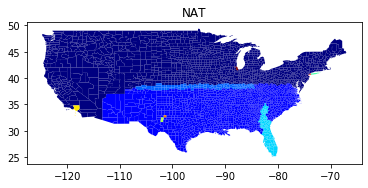

In [21]:
from pygeoda import geoda_to_geopandas
gdf = geoda_to_geopandas(gda)
gdf['SKATER'] = skater

import matplotlib
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list('skater', [(0, 'grey'), (1, 'blue'),()])

ax = gdf.plot(column='SKATER', categorical=et')
ax.set_title("NAT")
